In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random
import scipy
import sklearn
from sklearn.neighbors import KernelDensity
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
#generating the fake measurement centered in 1 with sigma 0.2
scale=0.02
mu=1
N=10000

#sample of mass in the gaussian distribution
distG=scipy.stats.norm(loc=mu,scale=scale)
mass_sample=distG.rvs(N)

#sample of chi^2 in uniform distribution
chi_sample=np.random.uniform(0,1,N)

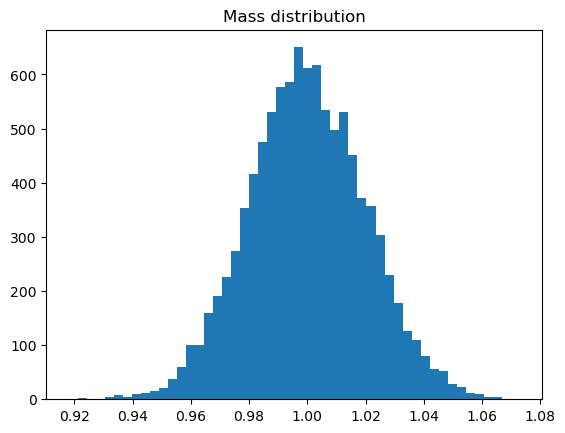

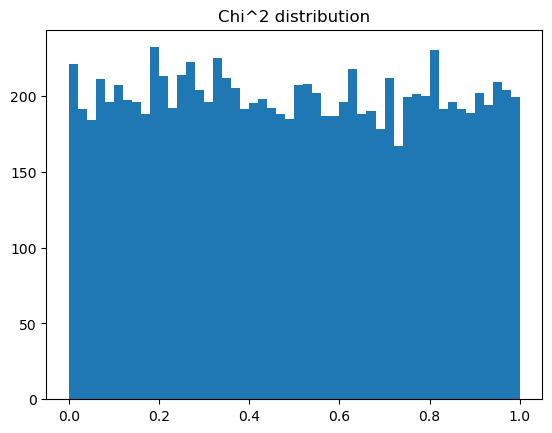

In [3]:
#histogram of the two distributon mass and chi2
plt.hist(mass_sample,bins=50)
plt.title('Mass distribution')
plt.show()
plt.hist(chi_sample,bins=50)
plt.title('Chi^2 distribution')
plt.show()

In [4]:
#definition of the f function and reduce mass function
def f(chi2):
    return np.sqrt((1+np.sqrt(1-chi2**2))/2)
    
def M_irreducible_fun(sample, chi2):
    return np.sqrt((1+np.sqrt(1-chi2**2))/2)*sample

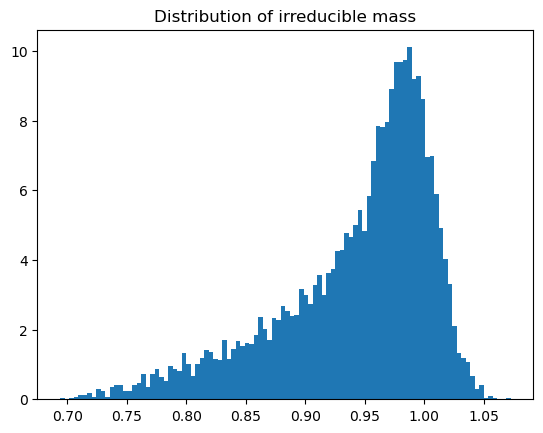

In [5]:
#compute irreducible mass distribution
M_irr=M_irreducible_fun(mass_sample, chi_sample)

plt.hist(M_irr, bins=100, density=True)
plt.title('Distribution of irreducible mass')
plt.show()

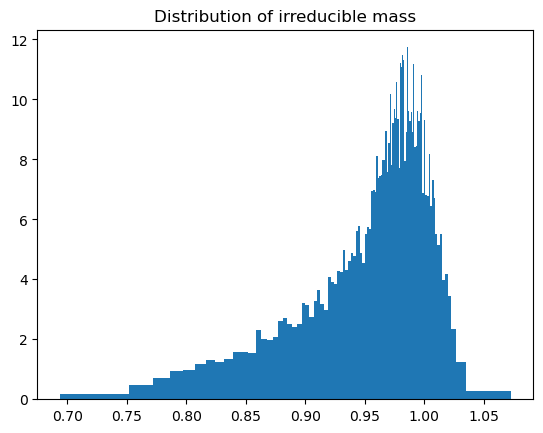

In [6]:
#re-binning with variable number of bins
N_bins=100
bins_set=np.append(np.sort(M_irr)[::N_bins], np.max(M_irr))

plt.hist(M_irr, bins=bins_set, density=True)
plt.title('Distribution of irreducible mass')
plt.show()

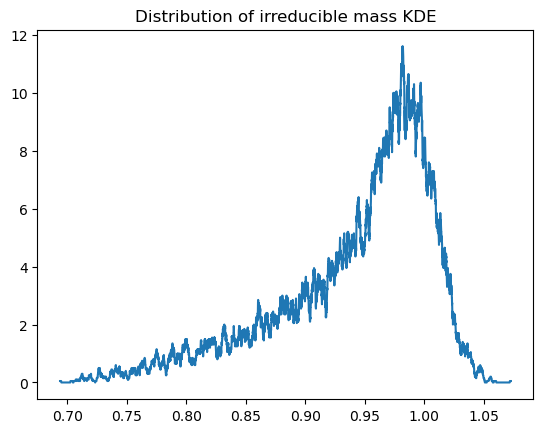

In [7]:
#computing the kernel density estimation
xgrid = np.linspace(M_irr.min(),M_irr.max(),N)

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)
    return np.exp(log_pdf)

#kernel used: tophat = finite distribution 
PDF_kde = kde_sklearn(M_irr, bandwidth=0.001, kernel="tophat")  
plt.plot(xgrid, PDF_kde)
plt.title('Distribution of irreducible mass KDE')
plt.show()

In [8]:
#KS distance between M_irr/mu and f function and M_irr and M
sigma=np.logspace(-5,5,1000)
N1=10000
D_KS_Mf=[]
D_KS_MM=[]

chi_sample_ks=np.random.uniform(0,1,N1)
f_sample=f(chi_sample_ks)

for i in range(0,len(sigma)):
    #distG_ks=scipy.stats.norm(loc=mu,scale=sigma[i])
    #samples of mass
    mass_sample_ks=np.random.normal(loc=mu,scale=sigma[i],size=N1)

    M_irr_sample_ks=M_irreducible_fun(mass_sample_ks,chi_sample_ks)
    
    D_KS_Mf.append(scipy.stats.ks_2samp(f_sample,M_irr_sample_ks/mu)[0])
    D_KS_MM.append(scipy.stats.ks_2samp(mass_sample_ks,M_irr_sample_ks)[0])

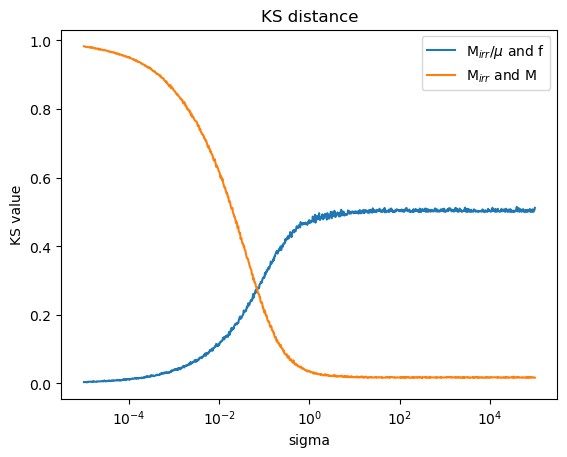

In [9]:
#plot of the 2 ks
plt.plot(sigma,D_KS_Mf, label='M$_{irr}/ \mu$ and f')
plt.plot(sigma,D_KS_MM, label='M$_{irr}$ and M')
plt.title('KS distance')
plt.xlabel('sigma')
plt.ylabel('KS value')
plt.legend()
plt.semilogx()
plt.show()

In [10]:
#distance KS small = same distribution
#m_irr/mu is distributed as f for small sigma
#m_irr is distributed as M for big sigma

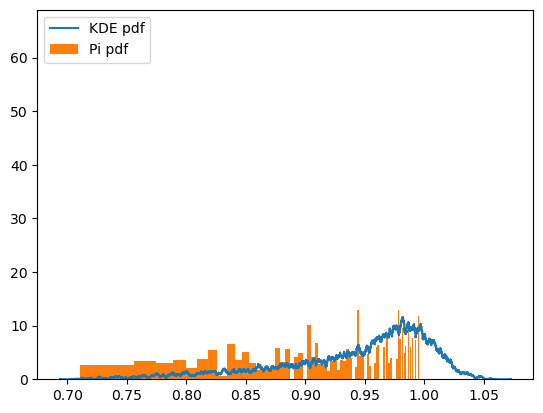

In [11]:
#pi function
pi=np.array(2*((2*(f(chi_sample))**2-1)/(np.sqrt(1-(f(chi_sample))**2))))

#re-binning with variable number of bins
N_bins=100
bins_set=np.append(np.sort(f(chi_sample))[::N_bins], np.max(f(chi_sample)))

plt.plot(xgrid, PDF_kde, label='KDE pdf')
plt.hist(pi, bins=bins_set, density=True, label='Pi pdf')
plt.legend(loc='upper left')

plt.show()

In [12]:
#p(Mirr) pdf
def integral(f_int,x_int):
    return (np.sqrt((2/np.pi))/scale) * np.exp(-(x_int/f_int -1)**2/(2*scale**2)) * (2*f_int**2-1)/np.sqrt((1-f_int**2)) /f_int

Mirr_int = [scipy.integrate.quad(lambda f_int: integral(f_int,xt), 1/2**0.5,1)[0] for xt in tqdm(xgrid)]

  0%|          | 0/10000 [00:00<?, ?it/s]

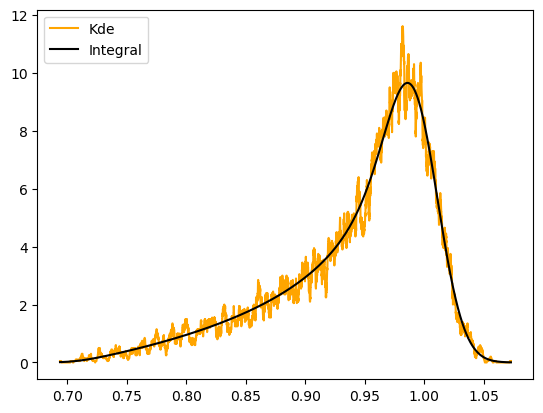

In [13]:
#plot the comparison of the integral and the KDE found
plt.plot(xgrid, PDF_kde, label='Kde', c='orange')
plt.plot(xgrid, Mirr_int, label='Integral',c='black')
plt.legend(loc='upper left')

plt.show()